### Importación de datos



In [56]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [31]:
# Extrae datos
precios1 = tienda["Precio"]
precios2 = tienda2["Precio"]
precios3 = tienda3["Precio"]
precios4 = tienda4["Precio"]
# Calcula totales de ingresos por tienda
ingreso_total1 = sum(precios1)
ingreso_total2 = sum(precios2)
ingreso_total3 = sum(precios3)
ingreso_total4 = sum(precios4)
# Calcula tiendas con máximo y mínimo de ingresos
total_tiendas = (ingreso_total1, ingreso_total2, ingreso_total3, ingreso_total4)
ingreso_max = max(total_tiendas)
ingreso_min = min(total_tiendas)
numero_tienda_max_ing = total_tiendas.index(ingreso_max)
numero_tienda_min_ing = total_tiendas.index(ingreso_min)
# Imprime los datos
print(f'El ingreso total de la tienda N° 1 es de $ {ingreso_total1}')
print(f'El ingreso total de la tienda N° 2 es de $ {ingreso_total2}')
print(f'El ingreso total de la tienda N° 3 es de $ {ingreso_total3}')
print(f'El ingreso total de la tienda N° 4 es de $ {ingreso_total4}')
print(f'La tienda con mayores ingresos es la tienda N° {numero_tienda_max_ing + 1} con un total de $ {ingreso_max}')
print(f'La tienda con menores ingresos es la tienda N° {numero_tienda_min_ing + 1} con un total de $ {ingreso_min}')

El ingreso total de la tienda N° 1 es de $ 1150880400.0
El ingreso total de la tienda N° 2 es de $ 1116343500.0
El ingreso total de la tienda N° 3 es de $ 1098019600.0
El ingreso total de la tienda N° 4 es de $ 1038375700.0
La tienda con mayores ingresos es la tienda N° 1 con un total de $ 1150880400.0
La tienda con menores ingresos es la tienda N° 4 con un total de $ 1038375700.0


# 2. Ventas por categoría

In [32]:
# Define función para extraer datos y separar por categorías
def desgloce_categorias(tienda) :
  categorias = list(tienda["Categoría del Producto"])
  categorias_unicas = list(set(categorias))
  lista_de_listas = []
  for categoria in categorias_unicas:
      lista = [cat for cat in categorias if cat == categoria]
      lista_de_listas.append(lista)
      cant_categorias = {categoria: categorias.count(categoria) for categoria in categorias_unicas}
  return cant_categorias
# Define función para buscar máxima cantidad de ventas entre las categorías
def buscar_max(vcat_tienda):
    categoria_max = max(vcat_tienda, key=lambda categoria: vcat_tienda[categoria])
    cantidad = vcat_tienda[categoria_max]
    return categoria_max, cantidad
# Aplica funciones
vcat_tienda1 = desgloce_categorias(tienda)
vcat_tienda2 = desgloce_categorias(tienda2)
vcat_tienda3 = desgloce_categorias(tienda3)
vcat_tienda4 = desgloce_categorias(tienda4)
vcat_tiendas = [vcat_tienda1, vcat_tienda2, vcat_tienda3, vcat_tienda4]
categoria_max_t1 = buscar_max(vcat_tienda1)
categoria_max_t2 = buscar_max(vcat_tienda2)
categoria_max_t3 = buscar_max(vcat_tienda3)
categoria_max_t4 = buscar_max(vcat_tienda4)
categorias_max = [categoria_max_t1, categoria_max_t2, categoria_max_t3, categoria_max_t4]
# Imprime los datos
i = 1
for num_tienda in vcat_tiendas:
    print(f'La distribución de ventas por categoría para la tienda N° {i}:')
    for categoria, cantidad in num_tienda.items():
        print(f'  * {categoria}: {cantidad} productos')
    i += 1
i = 1
for categoria, cantidad in categorias_max:
    print(f'La categoría más vendida en la tienda N° {i} fue "{categoria}" con {cantidad} productos.')
    i += 1

La distribución de ventas por categoría para la tienda N° 1:
  * Deportes y diversión: 284 productos
  * Juguetes: 324 productos
  * Libros: 173 productos
  * Electrodomésticos: 312 productos
  * Artículos para el hogar: 171 productos
  * Instrumentos musicales: 182 productos
  * Muebles: 465 productos
  * Electrónicos: 448 productos
La distribución de ventas por categoría para la tienda N° 2:
  * Deportes y diversión: 275 productos
  * Juguetes: 313 productos
  * Libros: 197 productos
  * Electrodomésticos: 305 productos
  * Artículos para el hogar: 181 productos
  * Instrumentos musicales: 224 productos
  * Muebles: 442 productos
  * Electrónicos: 422 productos
La distribución de ventas por categoría para la tienda N° 3:
  * Deportes y diversión: 277 productos
  * Juguetes: 315 productos
  * Libros: 185 productos
  * Electrodomésticos: 278 productos
  * Artículos para el hogar: 177 productos
  * Instrumentos musicales: 177 productos
  * Muebles: 499 productos
  * Electrónicos: 451 pr

# 3. Calificación promedio de la tienda


In [33]:
# Extrae datos
calificaciones1 = tienda["Calificación"]
calificaciones2 = tienda2["Calificación"]
calificaciones3 = tienda3["Calificación"]
calificaciones4 = tienda4["Calificación"]
# Calcula promedios de calificaciones por tienda
promedio1 = sum(calificaciones1) / len(calificaciones1)
promedio2 = sum(calificaciones2) / len(calificaciones2)
promedio3 = sum(calificaciones3) / len(calificaciones3)
promedio4 = sum(calificaciones4) / len(calificaciones4)
# Calcula tiendas con máximo y mínimo de promedios de calificaciones
total_tiendas = (promedio1, promedio2, promedio3, promedio4)
calificacion_max = max(total_tiendas)
calificacion_min = min(total_tiendas)
numero_tienda_max_calif = total_tiendas.index(calificacion_max)
numero_tienda_min_calif = total_tiendas.index(calificacion_min)
# Imprime los datos
print(f'La calificación promedio de la tienda N° 1 es de {promedio1:.2f}')
print(f'La calificación promedio de la tienda N° 2 es de {promedio2:.2f}')
print(f'La calificación promedio de la tienda N° 3 es de {promedio3:.2f}')
print(f'La calificación promedio de la tienda N° 4 es de {promedio4:.2f}')
print(f'La tienda con máximo promedio de calificación es la tienda N° {numero_tienda_max + 1} con un promedio de {calificacion_max:.2f}')
print(f'La tienda con mínimo promedio de calificación es la tienda N° {numero_tienda_min + 1} con un promedio de {calificacion_min:.2f}')

La calificación promedio de la tienda N° 1 es de 3.98
La calificación promedio de la tienda N° 2 es de 4.04
La calificación promedio de la tienda N° 3 es de 4.05
La calificación promedio de la tienda N° 4 es de 4.00
La tienda con máximo promedio de calificación es la tienda N° 1 con un promedio de 4.05
La tienda con mínimo promedio de calificación es la tienda N° 4 con un promedio de 3.98


# 4. Productos más y menos vendidos

In [34]:
# Define función para extraer datos y separar por productos
def desgloce_productos(tienda) :
  productos = list(tienda["Producto"])
  productos_unicos = list(set(productos))
  lista_de_listas = []
  for producto in productos_unicos:
      lista = [cat for cat in productos if cat == producto]
      lista_de_listas.append(lista)
      cant_productos = {producto: productos.count(producto) for producto in productos_unicos}
  return cant_productos
# Define función para buscar máxima cantidad de ventas de cada producto
def buscar_max(vprod_tienda):
    producto_max = max(vprod_tienda, key=lambda producto: vprod_tienda[producto])
    cantidad = vprod_tienda[producto_max]
    return producto_max, cantidad
# Define función para buscar mínima cantidad de ventas de cada producto
def buscar_min(vprod_tienda):
    producto_min = min(vprod_tienda, key=lambda producto: vprod_tienda[producto])
    cantidad = vprod_tienda[producto_min]
    return producto_min, cantidad
# Aplica funciones
vprod_tienda1 = desgloce_productos(tienda)
vprod_tienda2 = desgloce_productos(tienda2)
vprod_tienda3 = desgloce_productos(tienda3)
vprod_tienda4 = desgloce_productos(tienda4)
vprod_tiendas = [vprod_tienda1, vprod_tienda2, vprod_tienda3, vprod_tienda4]
producto_max_t1 = buscar_max(vprod_tienda1)
producto_max_t2 = buscar_max(vprod_tienda2)
producto_max_t3 = buscar_max(vprod_tienda3)
producto_max_t4 = buscar_max(vprod_tienda4)
productos_max = [producto_max_t1, producto_max_t2, producto_max_t3, producto_max_t4]
producto_min_t1 = buscar_min(vprod_tienda1)
producto_min_t2 = buscar_min(vprod_tienda2)
producto_min_t3 = buscar_min(vprod_tienda3)
producto_min_t4 = buscar_min(vprod_tienda4)
productos_min = [producto_min_t1, producto_min_t2, producto_min_t3, producto_min_t4]
# Imprime los datos
i = 1
for prod_max, prod_min in zip(productos_max, productos_min):
    print(f'En la tienda N° {i}:')
    print(f'  *  El producto más vendido fue: "{prod_max[0]}" con {prod_max[1]} unidades.')
    print(f'  *  El producto menos vendido fue: "{prod_min[0]}" con {prod_min[1]} unidades.')
    i += 1

En la tienda N° 1:
  *  El producto más vendido fue: "Armario" con 60 unidades.
  *  El producto menos vendido fue: "Auriculares con micrófono" con 33 unidades.
En la tienda N° 2:
  *  El producto más vendido fue: "Iniciando en programación" con 65 unidades.
  *  El producto menos vendido fue: "Juego de mesa" con 32 unidades.
En la tienda N° 3:
  *  El producto más vendido fue: "Kit de bancas" con 57 unidades.
  *  El producto menos vendido fue: "Bloques de construcción" con 35 unidades.
En la tienda N° 4:
  *  El producto más vendido fue: "Cama box" con 62 unidades.
  *  El producto menos vendido fue: "Guitarra eléctrica" con 33 unidades.


# 5. Envío promedio por tienda

In [35]:
# Extrae datos
costo_envios1 = tienda["Costo de envío"]
costo_envios2 = tienda2["Costo de envío"]
costo_envios3 = tienda3["Costo de envío"]
costo_envios4 = tienda4["Costo de envío"]
# Calcula promedios de costos de envíos por tienda
promedio_envio1 = sum(costo_envios1) / len(costo_envios1)
promedio_envio2 = sum(costo_envios2) / len(costo_envios2)
promedio_envio3 = sum(costo_envios3) / len(costo_envios3)
promedio_envio4 = sum(costo_envios4) / len(costo_envios4)
# Calcula tiendas con máximo y mínimo de promedios de costos de envíos
envios_total_tiendas = (promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4)
costo_envios_max = max(envios_total_tiendas)
costo_envios_min = min(envios_total_tiendas)
num_tienda_envios_max = envios_total_tiendas.index(costo_envios_max)
num_tienda_envios_min = envios_total_tiendas.index(costo_envios_min)
# Imprime los datos
print(f'El costo promedio de envío de la tienda N° 1 es de $ {promedio_envio1:.2f}')
print(f'El costo promedio de envío de la tienda N° 2 es de $ {promedio_envio2:.2f}')
print(f'El costo promedio de envío de la tienda N° 3 es de $ {promedio_envio3:.2f}')
print(f'El costo promedio de envío de la tienda N° 4 es de $ {promedio_envio4:.2f}')
print(f'La tienda con máximo costo promedio de envío es la tienda N° {num_tienda_envios_max + 1} con un promedio de {costo_envios_max:.2f}')
print(f'La tienda con mínimo costo promedio de envío es la tienda N° {num_tienda_envios_min + 1} con un promedio de {costo_envios_min:.2f}')

El costo promedio de envío de la tienda N° 1 es de $ 26018.61
El costo promedio de envío de la tienda N° 2 es de $ 25216.24
El costo promedio de envío de la tienda N° 3 es de $ 24805.68
El costo promedio de envío de la tienda N° 4 es de $ 23459.46
La tienda con máximo costo promedio de envío es la tienda N° 1 con un promedio de 26018.61
La tienda con mínimo costo promedio de envío es la tienda N° 4 con un promedio de 23459.46


# Gráfico 1

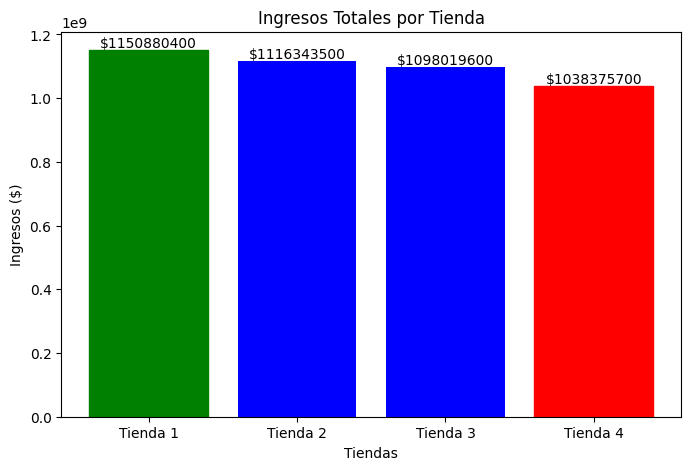

In [58]:
from matplotlib import pyplot as plt
# Asigna datos a listas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_total1, ingreso_total2, ingreso_total3, ingreso_total4]
# Crea gráfico base
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, ingresos, color='blue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
# Setea color según máximo y mínimo de ingresos entre tiendas
barras[numero_tienda_max_ing].set_color('green')
barras[numero_tienda_min_ing].set_color('red')
# Agrega el correspondiente valor sobre la barra
i = 0
for ingreso in ingresos:
    plt.text(i, ingreso, f"${int(ingreso)}", ha='center', va='bottom')
    i += 1
plt.show()

# Gráfico 2

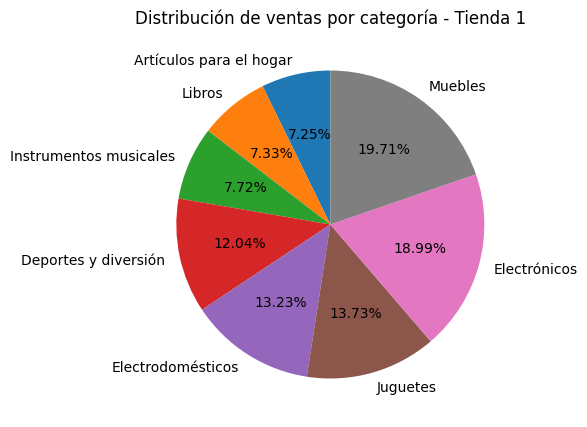

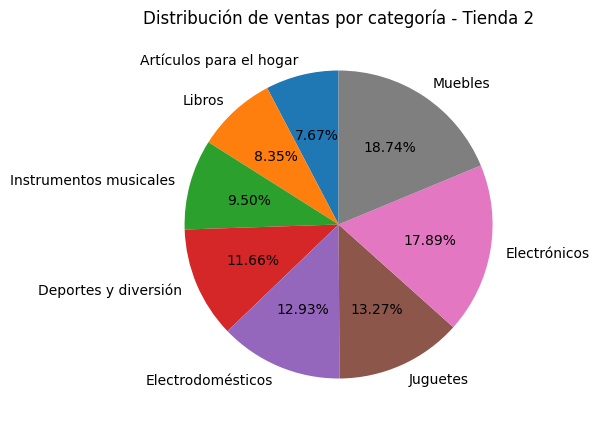

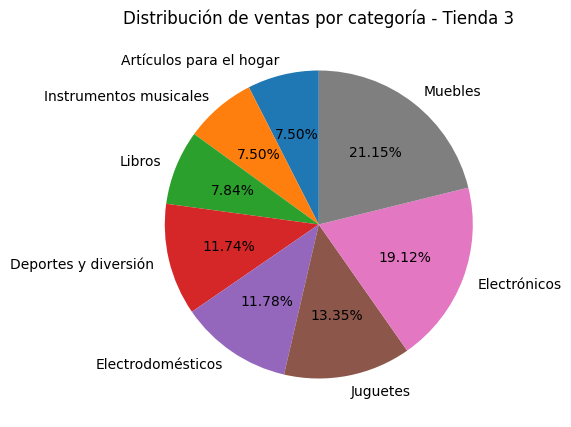

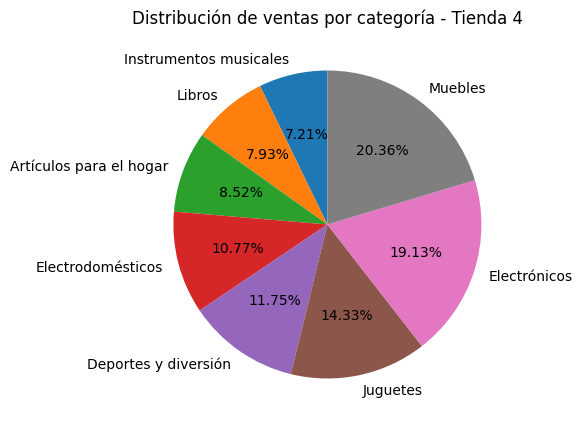

In [55]:
i = 0
for vcat in vcat_tiendas:
    # Ordena categorías por cantidad y separa llaves de valores
    vcat_ordenado = dict(sorted(vcat.items(), key=lambda item: item[1]))
    categoria = list(vcat_ordenado.keys())
    cantidades = list(vcat_ordenado.values())
    # Crea gráfico base por cada tienda
    plt.figure(figsize=(5, 5))
    plt.title(f'Distribución de ventas por categoría - {nombres_tiendas[i]}')
    # Calcula el porcentaje y lo carga en el gráfico
    plt.pie(cantidades, labels=categoria, autopct='%1.2f%%', startangle=90)
    plt.show()
    i += 1

# Gráfico 3

# Gráfico 4

# Gráfico 5